In [1]:
import matplotlib.pyplot as plt
import gym
import navstack_gym
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

In [2]:
env = gym.make('TreasureSearchRoom-v1', path_planning_count=5)
env.reset(scene_obstacle_count=10, scene_obstacle_zone_thresh=1)
N = 30

/home/moyash/tmptmp/navstack-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/home/moyash/tmptmp/navstack-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/moyash/tmptmp/navstack-gym/.venv/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


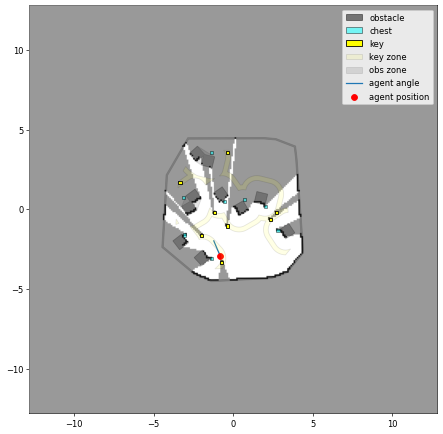

In [3]:
imgs = []
imgs.append(env.render('rgb_array'))

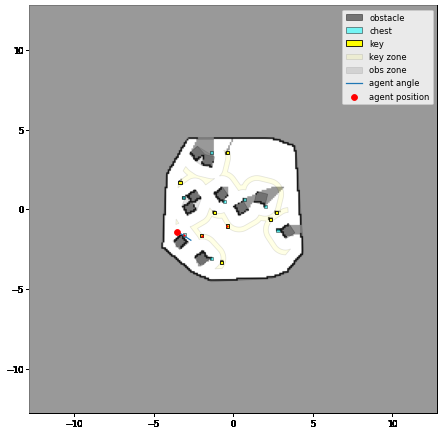

In [4]:
for i in range(N):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    imgs.append(env.render('rgb_array'))

In [5]:
navstack_gym.utils.create_gif(imgs, mode="RGBA", duration=100)

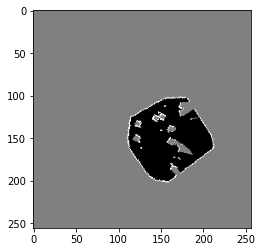

In [6]:
obs[obs==-1] = 50
plt.imshow(obs, cmap='gray')